# Task 2.3 - Random Forest for Basel data (all years)

# The Scripts Contents

1. Importing Libraries and Data

2. Data Wrangling

3. Reshaping for modeling

4. Data Split

5. Random Forest Model

6. Uncovering Feature Importances

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [5]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\Machine Learning\Data sets'

In [6]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [7]:
df1 = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [8]:
x = pd.read_csv(os.path.join(path, 'Original Data X_cleaned.csv'))

In [9]:
df = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [10]:
x.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.01,

In [11]:
x.shape

(22950, 135)

In [12]:
df1.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df1.shape

(22950, 16)

# 2. Data Wrangling
Reduce data to one station only. For this script: Debilt.

In [40]:
# Create a list of the columns containing "Debilt" in their names

debilt_list = list(x for x in x.columns if x.find('DEBILT') >=0)
debilt_list

['DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max']

In [41]:
# Create a dataframe with those columns

df_debilt = x[debilt_list]
df_debilt

,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max
0,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0
1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3
2,6,0.92,1.0165,0.28,0.01,3.0,6.8,4.6,9.9
3,8,0.95,1.0265,0.08,0.09,0.0,6.7,3.6,10.1
4,6,0.90,1.0243,0.04,0.39,0.0,8.0,2.4,11.2
...,...,...,...,...,...,...,...,...,...
22945,8,0.84,1.0190,1.13,0.22,2.8,15.7,12.8,19.4
22946,8,0.84,1.0177,1.13,0.22,3.5,16.0,10.3,20.5
22947,8,0.86,1.0174,1.13,0.22,3.3,15.8,9.3,21.1
22948,8,0.87,1.0174,1.13,0.22,6.0,14.4,10.3,20.2


In [42]:
# Reduce answers dataset to Debilt's answers only

df1_debilt = df1['DEBILT_pleasant_weather']
df1_debilt

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: DEBILT_pleasant_weather, Length: 22950, dtype: int64

In [43]:
df_debilt.shape # observations dataset has the correct shape

(22950, 9)

In [44]:
df1_debilt.shape # predictions dataset has the correct shape

(22950,)

# 3. Reshaping for modeling

In [45]:
X2 = df_debilt

In [46]:
y2 = df1_debilt

In [47]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [48]:
X.shape

(22950, 9)

In [49]:
y.shape

(22950,)

# 4. Data Split

In [50]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [52]:
X_train

array([[  6.    ,   0.66  ,   1.0154, ...,  16.3   ,   7.5   ,  21.8   ],
       [  6.    ,   0.82  ,   1.0163, ...,  -2.5   ,  -8.    ,   0.7   ],
       [  3.    ,   0.89  ,   1.011 , ...,  -4.9   , -10.    ,  -2.1   ],
       ...,
       [  8.    ,   0.96  ,   1.0053, ...,   8.3   ,   7.    ,   9.1   ],
       [  6.    ,   0.79  ,   1.0113, ...,  10.7   ,   7.8   ,  14.8   ],
       [  2.    ,   0.78  ,   1.0248, ...,   6.3   ,   0.    ,  12.6   ]])

In [53]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
X_test

array([[ 5.    ,  0.81  ,  1.0156, ..., 12.6   ,  8.4   , 17.8   ],
       [ 7.    ,  0.7   ,  1.0067, ...,  1.4   ,  0.    ,  3.6   ],
       [ 7.    ,  0.86  ,  1.0058, ..., 16.7   , 14.1   , 18.    ],
       ...,
       [ 1.    ,  0.83  ,  1.0126, ..., 10.8   ,  4.6   , 20.    ],
       [ 5.    ,  0.82  ,  1.0257, ...,  7.7   ,  3.9   , 12.3   ],
       [ 7.    ,  0.89  ,  1.0208, ..., 10.3   ,  6.9   , 12.9   ]])

In [55]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 5. Random Forest Model

In [56]:
# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create a RF classifier
clf = RandomForestClassifier(n_estimators=100)  

# Training the model on the training dataset
clf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Predict using the model
y_pred = clf.predict(X_test)

# Calculate and print model accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


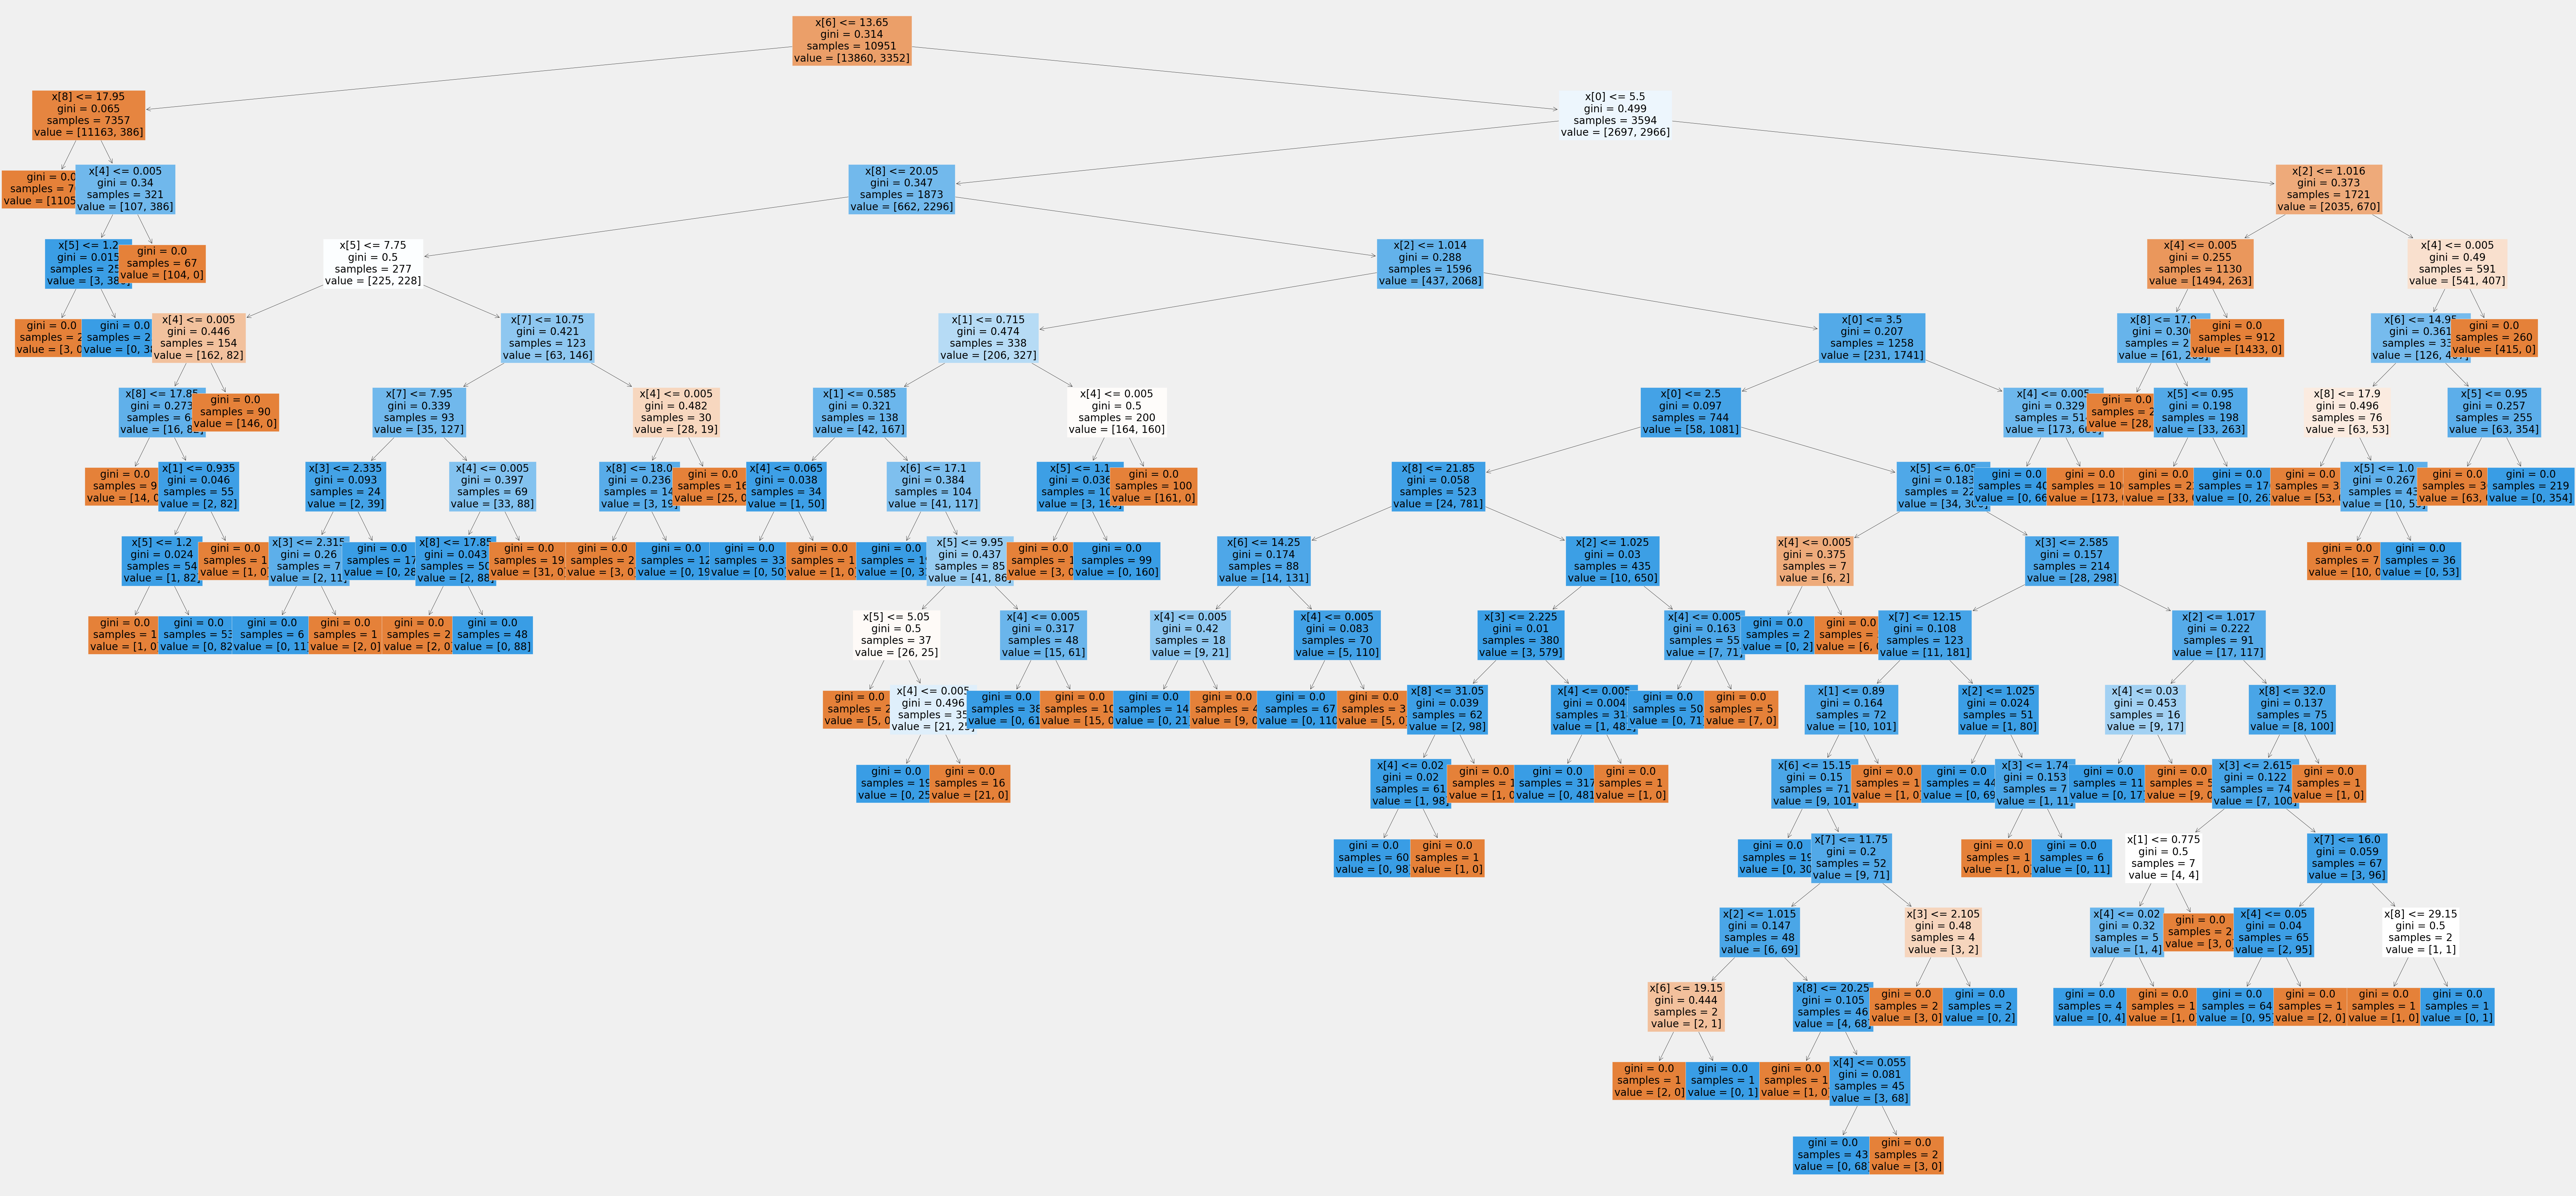

In [58]:
# Import plot_tree from sklearn.tree
from sklearn.tree import plot_tree

# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [59]:
fig.savefig(os.path.join(path, 'random_forest_Debilt.png'),bbox_inches='tight')

# 6. Uncovering Feature Importances

In [60]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.02270886, 0.01246924, 0.01583791, 0.06719755, 0.34100336,
       0.07180157, 0.11501968, 0.01995145, 0.33401038])

In [64]:
# Create a list of weather features

wx_list = [feature.replace('DEBILT_', '') for feature in debilt_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [65]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.022709
humidity            0.012469
pressure            0.015838
global_radiation    0.067198
precipitation       0.341003
sunshine            0.071802
temp_mean           0.115020
temp_min            0.019951
temp_max            0.334010
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


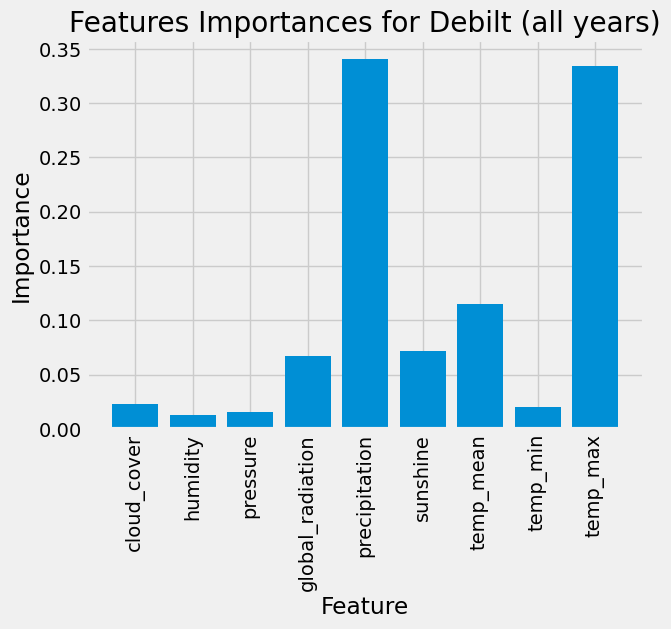

In [66]:
# Plot the results
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Debilt (all years)');

plt.savefig(os.path.join(path, 'Debilt_feature_importances.png'), bbox_inches='tight')
plt.show()